__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/10_Create_Random_Data.ipynb)__

# Create Random Data for Testing
* `random_series`: Returns a series of random data of several types, including names, random walks with perlin-noise and errorprone series to test your functions.
* `decorate`: Decorates a series with specials (e.g. NaNs)
* `people` and `random_numbers`: Random data for testing.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 22:30:48


time: 458 ms


In [2]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import random

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
#pak.Config.set('VERBOSE', True)

time: 284 ms


## random_series()

In [3]:
?pak.random_series

time: 56.4 ms


Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal pl

### Simple

In [4]:
# i f s n c means int float string name choice
size = 100
i = pak.random_series( size, 'i')
f = pak.random_series( size, 'f')
s = pak.random_series( size, 's')
n = pak.random_series( size, 'n')
c = pak.random_series( size, 'c')
pak.dataframe( (i, f, s, n, c) )

,rnd_int,rnd_float,rnd_string,rnd_name,rnd_choice
0,861,0.880,3xYÄ,Bernhard,a
1,494,0.652,G59S2A,Jonas,e
2,2,0.206,XüVWN,Leo,b
3,592,0.261,OrOeC,Martha,c
4,590,0.128,BHÖmz,Timm,d
...,...,...,...,...,...
95,261,0.176,dNAlÖ,Christel,e
96,537,0.031,aäLhB,Jannis,c
97,245,0.883,1oDTH,Hans,b
98,374,0.540,dYiIJÄÜ,Eileen,d


time: 58.2 ms


### Random Numbers

In [5]:
# Several types of random numbers, with parameters
size = 100
i = pak.random_series( size, 'int',        min=-5, max=5,     p_nan=0.1,   p_dup=0    )
f = pak.random_series( size, 'float',      decimals=4,        p_nan=0.1,   p_dup=0    )                       
a = pak.random_series( size, 'ascending'                                              )
d = pak.random_series( size, 'descending'                                             )
p = pak.random_series( size, 'perlin',     freq=[2,1,8,1],                            )

# decorate f with 50% 0-values  
f = f.apply(pak.decorate, special=0, p=0.5)  

df = pak.dataframe( (i,f,a,d,p) )
pak.sample(df)

,rnd_int,rnd_float,rnd_ascending,rnd_descending,rnd_perlin
0,<NA>,0.0000,0.000000,1.000000,0.000000
1,5,0.0000,0.007508,0.996175,0.020308
10,-5,0.0000,0.231588,0.811047,0.390864
25,<NA>,0.0000,0.255300,0.638092,0.964789
46,-3,NaN,0.271245,0.627618,0.358887
56,-3,0.9849,0.273488,0.626691,0.111246
72,-1,0.1933,0.423210,0.548266,-1.000000
99,4,0.6161,1.000000,0.000000,-0.050508


time: 148 ms


<AxesSubplot: >

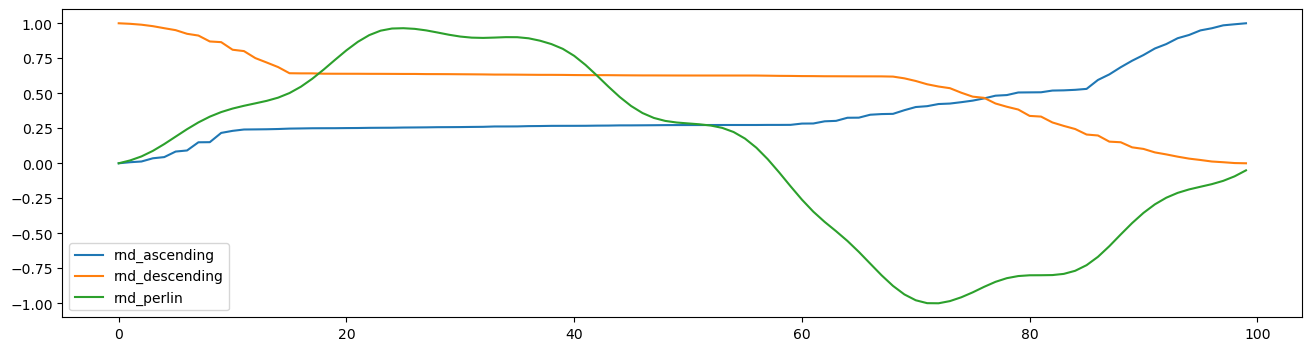

time: 308 ms


In [6]:
# ascending, descending and perlin are ordered random sequences
%matplotlib inline
spalten = ['rnd_ascending','rnd_descending','rnd_perlin',]
pak.plot(df[spalten])

In [7]:
#pak.analyse_cols(df)

time: 15.6 ms


### Strings, names, lists and other types

In [8]:
# Strings, names, lists and other types, with parameters
size = 100
s = pak.random_series( size, 'string', len_min=2, len_max=20,           p_nan=0.2,   p_dup=0    )
n = pak.random_series( size, 'name',                                    p_nan=0.2,   p_dup=0.33 )
c = pak.random_series( size, 'choice', choice=['Bremen','Bremerhaven'], p_nan=0.3,   p_dup=0,    name='rnd_city')
l = pak.random_series( size, 'list',                                    p_nan=0.3,   p_dup=0.5  )
m = pak.random_series( size, 'mix',                                     p_nan=0.1,   p_dup=0    )
df = pak.dataframe( (s, n, c, l, m) )
pak.sample(df)

,rnd_string,rnd_name,rnd_city,rnd_list,rnd_mix
0,<NA>,Michelle,Bremen,"[Stefanie, Maya, Melanie, Hendrik, Yvonne, Hol...",{0}
1,lJ7ü1wD0Ö7,Marina,Bremerhaven,"[Günther, Tanja, Herta, Angelika, Katrin]",0.9655
24,JTRTF,Lilly,NaN,"[Anna, Cornelia, Arne, Tom, Anja, Doris, Chris...",NaN
34,Cc22öDcmmg3AOia6emÜi,Yvonne,Bremen,"[Tom, Tom, Carina, Louis, Kathrin, Anja, Tanja...",Bremerhaven
66,<NA>,Alfred,Bremerhaven,"[Celina, Cornelia, Anja, Hermann, Anja, Mara]",52571
69,öUA4,<NA>,Bremerhaven,NaN,Dominik
80,0deNiNXe19C4TcQDäME6,<NA>,NaN,"[Irmgard, John, Tanja, Eric, Tom, Hannes, Loth...","[Fiona, Max, Anna, Mike, Nico, Karla, Reinhard..."
99,ye553öcaWdDu,Kirsten,NaN,"[Tom, Mark, Yvonne]",Marko


time: 198 ms


### Random progressions
Random progressions are `random_series` with typ `'ascending'`, `'descending'` or `'perlin'`.

In [9]:
# Some random progressions
size = 100
a = pak.random_series( size, random.choice([ 'a','d','p']))
b = pak.random_series( size, random.choice([ 'a','d','p']))
c = pak.random_series( size, random.choice([ 'a','d','p']))
d = pak.random_series( size, random.choice([ 'a','d','p']))
e = pak.random_series( size, random.choice([ 'a','d','p']))
f = pak.random_series( size, random.choice([ 'a','d','p']))
g = pak.random_series( size, random.choice([ 'a','d','p']))
h = pak.random_series( size, random.choice([ 'a','d','p']))
i = pak.random_series( size, random.choice([ 'a','d','p']))
j = pak.random_series( size, random.choice([ 'a','d','p']))
df = pak.dataframe( (a,b,c,d,e,f,g,h,i,j) )
df.head(3)

,A,B,C,D,E,F,G,H,I,J
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-0.108807,0.001043,0.998829,-0.092455,0.000976,0.006252,0.123653,-0.006876,0.001497,0
2,-0.223790,0.005622,0.987832,-0.147417,0.026687,0.007700,0.214347,-0.019799,0.007038,0


time: 178 ms


<AxesSubplot: >

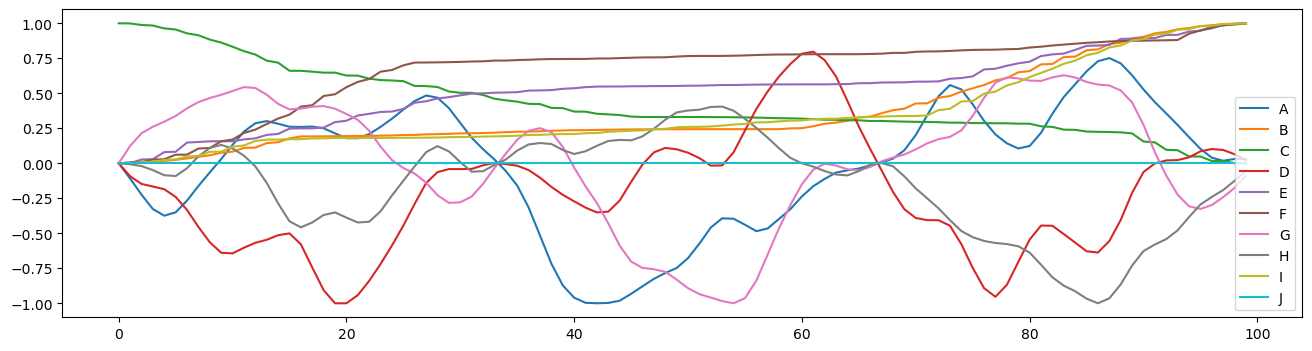

time: 402 ms


In [10]:
%matplotlib inline
pak.plot(df)

### Random Scaling 
* use scale(), see "Scale Numbers"

min = -0.0030168487875507207
max = -0.0026522521985435058


<AxesSubplot: >

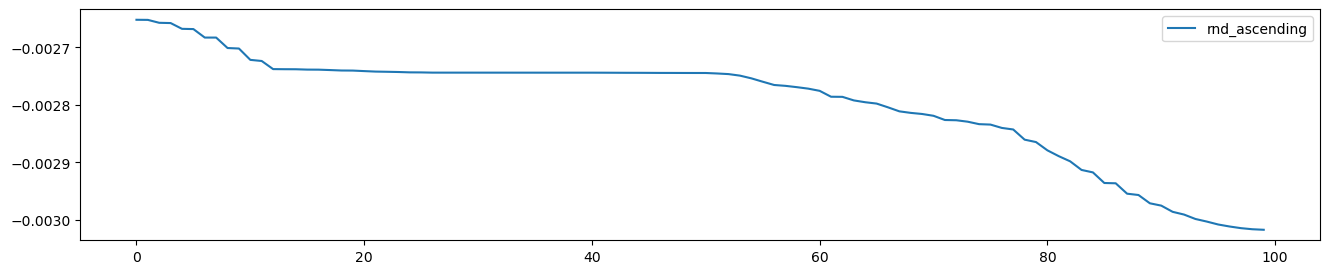

time: 267 ms


In [11]:
s = pak.random_series(100, 'a') 
s = pak.scale(s, 'random')   

print(  'min =', s.min() )
print(  'max =', s.max() )

%matplotlib inline
pak.plot(s)

### Random Error-prone Series
'errorprone' generates sequences of NaNs, 0, 1 with similar index.
Useful for testing. 

In [12]:
# try this sereral times
pak.random_series( 7, 'errorprone')  

0.0    42
0.0    42
0.0    42
NaN    42
NaN    42
NaN    42
0.0    42
Name: rnd_errorprone_9i8, dtype: int64

time: 20.9 ms


## random_perlin()
You can access random perlin noise by the function `random_series` with `typ='perlin'`
of by the function `random_perlin`.

In [13]:
?pak.random_perlin

time: 19.4 ms


Signature: pak.random_perlin(shape=(100, 5), freq=[3, 6, 12, 24], op='add')
Docstring:
Returns a Dataframe with Perlin Noise:
- Every column looks like a random walk.
- The columns correlate (the noise is 2-dim)
* shape: The shape of the result
* freq:  Up to 4 frequencies for the random walk.
         The frequencies are added or multipied with descending factors 1, 1/2, 1/4 and 1/16.
         A frequency of 1 means 1 maximum and 1 minimum.
         A frequency of 2 means 2 maxima  and 2 minima.                
         A frequency of 0 means, that nothing is added for the corresponding factor.
         E.g. freq=[1,0,0,100] gives a very low-frequency random walk 
         with a very slight admixture of high-frequency components. 
* op:    'add' or 'mult', how the frequencies are linked together
            
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [14]:
# default perlin
df = pak.random_perlin( shape=(100,15) )
df.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,0.000000,-0.339150,-0.310526,-0.292266,-0.142866,0.000000,0.082328,0.040746,0.045379,0.168420,0.000000,-0.170636,-0.317490,0.012430,0.019485
1,-0.005995,-0.332643,-0.305237,-0.280421,-0.108907,0.024145,0.073343,0.006557,0.024523,0.163394,-0.003398,-0.149576,-0.285101,0.036249,0.022345
2,-0.010993,-0.332004,-0.299841,-0.269156,-0.077581,0.041870,0.068742,-0.010113,0.022319,0.152247,-0.006952,-0.130880,-0.242511,0.046188,0.030581
3,-0.013171,-0.332886,-0.277914,-0.257265,-0.041948,0.056751,0.074501,-0.007230,0.032698,0.142465,-0.013503,-0.113751,-0.182484,0.035501,0.039135
4,-0.010369,-0.331840,-0.232679,-0.236709,0.004881,0.079518,0.083637,0.005644,0.047205,0.147454,-0.007334,-0.092293,-0.108676,0.010581,0.029895


time: 235 ms


<AxesSubplot: >

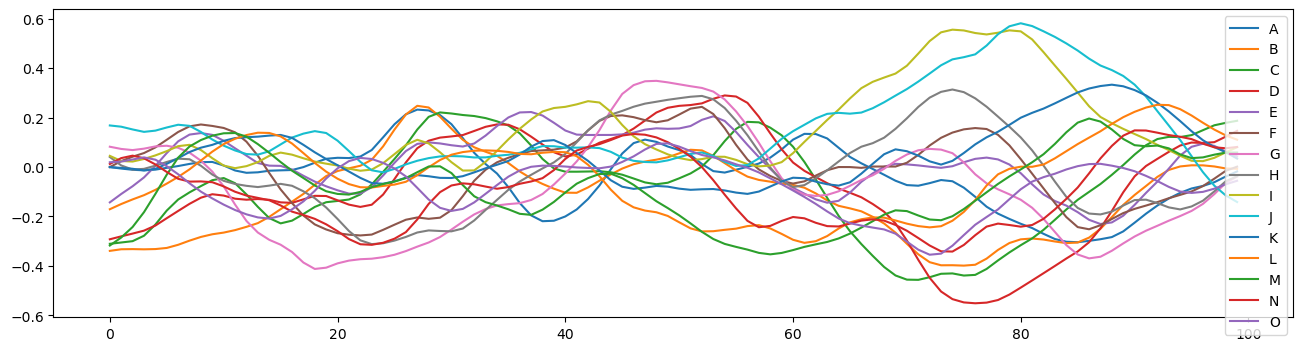

time: 541 ms


In [15]:
%matplotlib inline
pak.plot(df)

<AxesSubplot: >

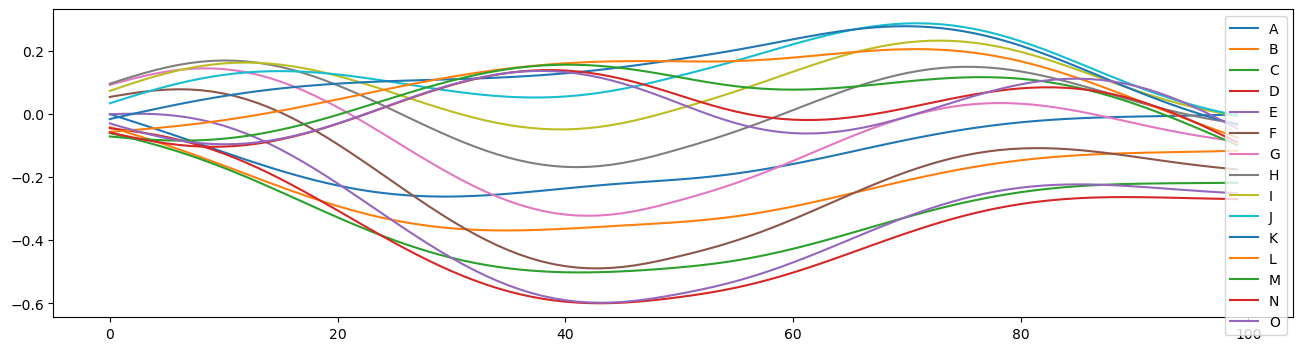

time: 578 ms


In [16]:
# freq 2 means: 2 minima and 2 maxima
df = pak.random_perlin( shape=(100,15), freq=2 )
pak.plot(df)

<AxesSubplot: >

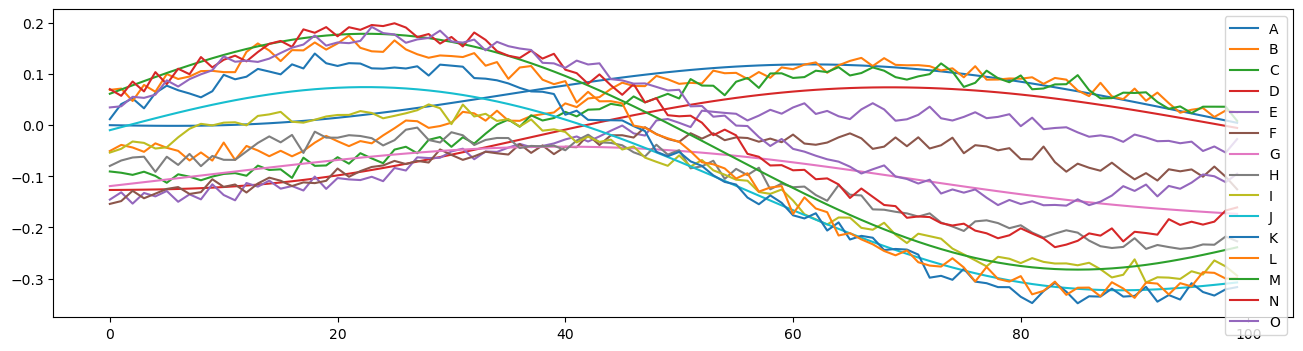

time: 689 ms


In [17]:
# freq 1 added to a little bit freq 100
df = pak.random_perlin( shape=(100,15), freq=[1,0,0,100] )
pak.plot(df)

<AxesSubplot: >

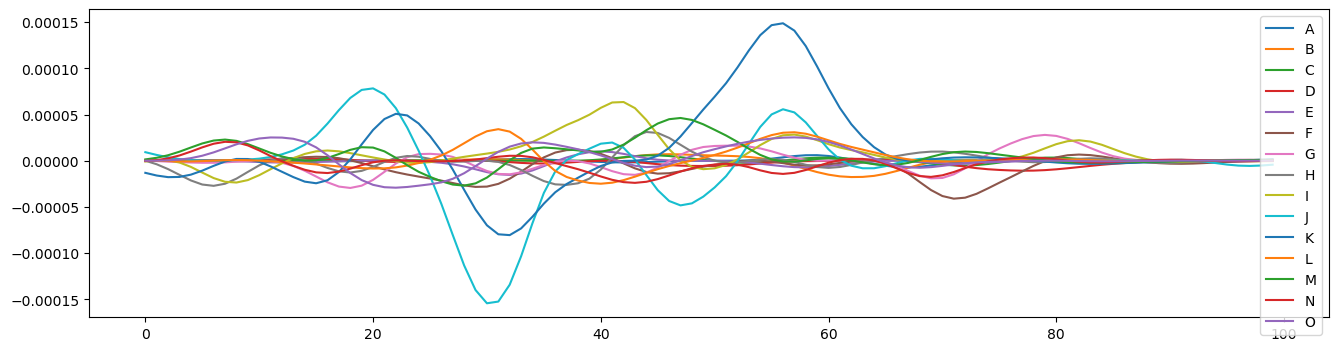

time: 567 ms


In [18]:
df = pak.random_perlin( shape=(100,15), freq=[1,1,4,8], op='mult')
pak.plot(df)

## decorate()

In [19]:
?pak.decorate

time: 11.7 ms


Signature: pak.decorate(skalar, p=0.2, special=nan)
Docstring:
Decorates a series with specials (e.g. NaNs), is applied with apply
e.g. result = result.apply(decorate, p=0.1)               # decorate with 10% nan  
e.g. result = result.apply(decorate, p=0.1, special='a')  # decorate with 10% 'a'.              
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [20]:
df = pak.dataframe( [ list('Babykorb'), 
                      list('abfällig'), 
                      list('Abgründe'), 
                      list('Kätzchen'), 
                      list('Landwirt'), 
                      list('lebendig'), 
                      list('Saugrohr'),       
                      list('Trugbild'),                     
                ] )
df['B'] = df.B.apply( pak.decorate, p=0.2, special='😀')
df['H'] = df.H.apply( pak.decorate, p=0.2)
df

,A,B,C,D,E,F,G,H
0,B,😀,b,y,k,o,r,b
1,a,b,f,ä,l,l,i,g
2,A,😀,g,r,ü,n,d,e
3,K,ä,t,z,c,h,e,n
4,L,a,n,d,w,i,r,t
5,l,e,b,e,n,d,i,g
6,S,a,u,g,r,o,h,r
7,T,😀,u,g,b,i,l,d


time: 28 ms


## people(): Easy Random Data

In [21]:
?pak.people

time: 12.6 ms


Signature: pak.people(size=100)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [22]:
# Test data
df = pak.people()
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Inge,33,30,78157,<NA>,RY8HbH58Eo,"{f, R, z, a}",[]
4,Nadine,29,20,88295,<NA>,älhÜa,{m},"[A, B, C, C]"
8,Ali,26,20,62008,<NA>,0YzmZM,{C},"[a, b, c]"
22,Michael,39,30,99435,Berlin,xqqgkSGÜ,"{a, S, C, d}","[A, B, C]"
23,Gerda,23,20,<NA>,Berlin,7BVeqK,"{K, N, E, 5}","[c, b, a]"
29,Walther,32,30,36514,<NA>,Ty81u,"{O, S, D, J}","[A, B, C, C]"
46,Cornelia,20,20,32214,Berlin,ÖJw4YRaD,"{e, b, M, g}","[A, B, C, C]"
48,Erik,33,30,54962,Berlin,XBbVre2,"{u, Y, h, Q}","[A, x]"
50,Silvia,21,20,10147,Bremen,id1VKNr,"{X, Y, k}","[a, b, c]"
61,Ben,29,20,28538,Bremen,PölAW0Q,"{n, X, v, Q, j}","[A, x]"


time: 255 ms


In [23]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int8,True,False,True,False,80.0 B,1,100,0,0,100,0.0,49.50,49.5,99.0,4950.0
1,first_name,str,pd.string,string,,False,True,True,True,623.0 B,1,70,0,30,100,Ali,NaN,NaN,Walther,NaN
2,age,int8,pd.Int8,Int8,,True,False,True,True,20.0 B,1,22,0,78,100,20.0,30.98,31.0,41.0,3098.0
3,age_class,int8,pd.Int8,Int8,,True,False,True,True,20.0 B,1,3,0,97,100,20.0,26.20,30.0,40.0,2620.0
4,postal_code,int32,pd.Int32,Int32,,True,False,True,True,50.0 B,1,68,2,30,100,10147.0,51159.90,46823.5,99435.0,5013670.0
5,birthplace,str,pd.string,string,,False,True,True,True,515.0 B,1,2,33,65,100,Berlin,NaN,NaN,Bremen,NaN
6,secret,str,pd.string,string,,False,True,True,True,741.0 B,1,100,0,0,100,0YzmZM,NaN,NaN,üoetei,NaN
7,features,set,object,object,,False,True,False,True,3.0 KB,1,80,0,20,100,{},NaN,NaN,"{K, Q}",NaN
8,history,list,object,object,,False,True,False,True,704.0 B,1,9,0,91,100,[],NaN,NaN,"[c, b, a]",NaN


time: 75.7 ms


## random_numbers()

In [24]:
?pak.random_numbers

time: 16.6 ms


Signature: pak.random_numbers(size=1000)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [25]:
# Test data
df = pak.random_numbers()
pak.sample(df)

,A,B,C,D,E
0,28,27807,0.801,3.51,0.000000
4,31,33876,0.926,0.78,0.000399
113,20,59215,0.151,7.49,0.243589
118,39,87127,0.999,3.74,0.263180
214,37,10741,0.337,6.08,0.471482
240,26,68392,0.955,0.00,0.504322
311,42,22399,0.989,4.77,0.618297
339,39,99875,0.479,9.36,0.665187
433,34,12602,0.602,7.70,0.772984
485,29,58165,0.434,2.58,0.800760


time: 242 ms


In [26]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int16,True,False,True,False,80.0 B,1,1000,0,0,1000,0.0,499.50,499.50,999.00,499500.00
1,A,int8,pd.Int8,Int8,,True,False,True,True,20.0 B,1,23,0,977,1000,20.0,31.10,31.00,42.00,31101.00
2,B,int32,pd.Int32,Int32,,True,False,True,True,50.0 B,1,699,0,301,1000,10741.0,55156.67,55105.00,99875.00,55156665.00
3,C,float32,np.float32,float32,,True,False,True,True,40.0 B,1,700,0,300,1000,0.0,0.49,0.49,1.00,492.48
4,D,float32,np.float32,float32,,True,False,True,True,40.0 B,1,700,0,300,1000,0.0,4.87,5.02,9.99,4871.54
5,E,float32,np.float32,float32,,True,False,True,True,40.0 B,1,998,0,2,1000,0.0,0.69,0.81,1.00,694.80


time: 67.2 ms


<AxesSubplot: >

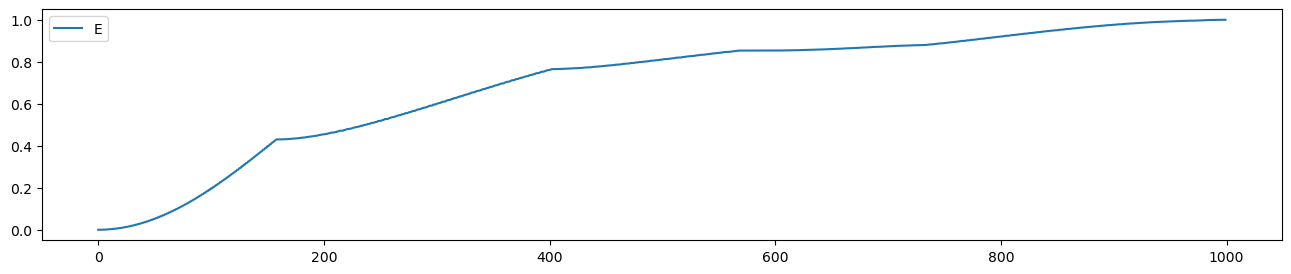

time: 243 ms


In [27]:
pak.plot(df.E)